
# Titanic EDA Project
This notebook performs an **Exploratory Data Analysis (EDA)** on the classic Titanic dataset.
We aim to uncover insights about passenger demographics, survival rates, and key factors influencing survival.

## Goals:
- Understand data structure and missing values
- Clean and preprocess data
- Visualize important relationships
- Derive business and analytical insights


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline


##  Data Overview
In this section, we load the Titanic dataset and examine its structure, data types, and missing values.


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("titanic.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


##  Data Cleaning
Here, we handle missing values and prepare the dataset for analysis.


In [22]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [32]:
df["Has_Cabin"] = df["Cabin"].notnull().astype(int)
df.drop(columns=["Cabin"], inplace=True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

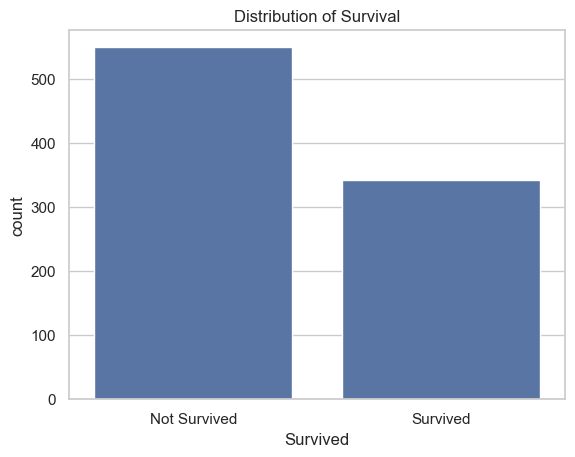

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [36]:
sns.countplot(x="Survived" , data=df)
plt.title("Distribution of Survival")
plt.xticks([0,1] , ["Not Survived" , "Survived"])
plt.show()

df["Survived"].value_counts(normalize=True) *100

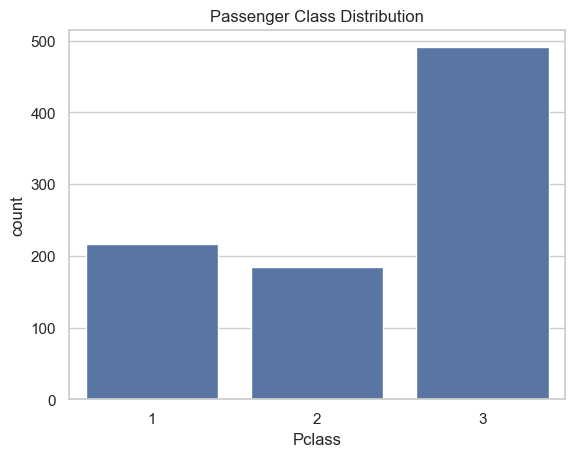

In [38]:
sns.countplot(x="Pclass" , data=df)
plt.title("Passenger Class Distribution")
plt.show()


## Exploratory Data Analysis (EDA)
This section explores relationships between features and survival rates using visualizations and statistical summaries.


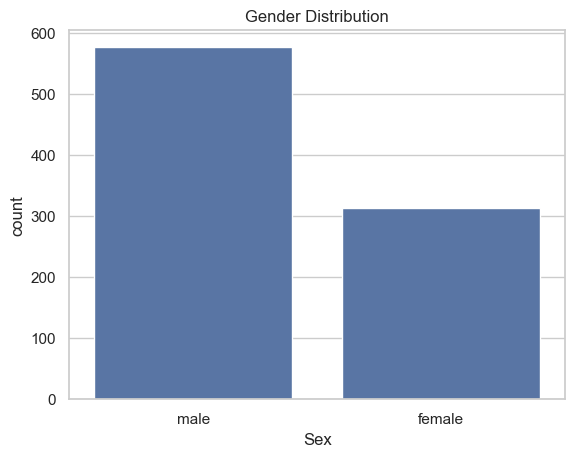

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [41]:
sns.countplot(x="Sex" , data=df)
plt.title("Gender Distribution")
plt.show()

df["Sex"].value_counts(normalize=True) *100

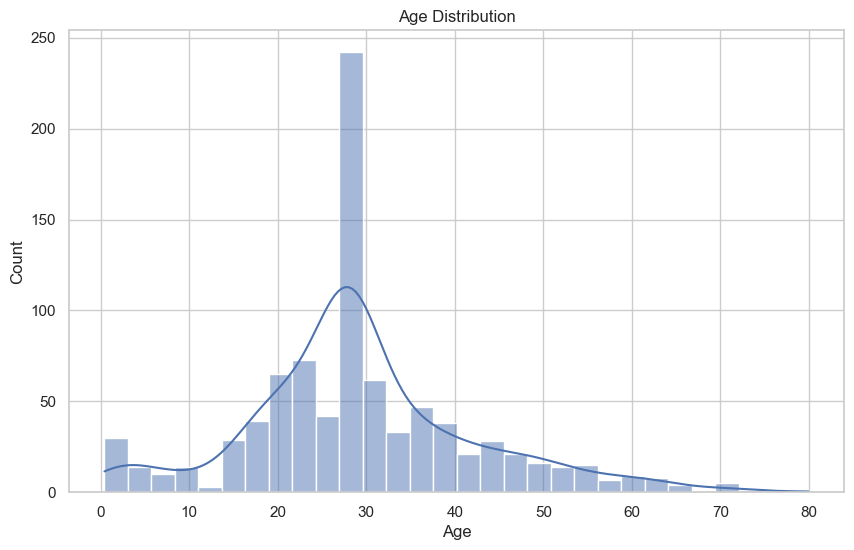

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"], kde=True , bins=30)
plt.title("Age Distribution")
plt.show()

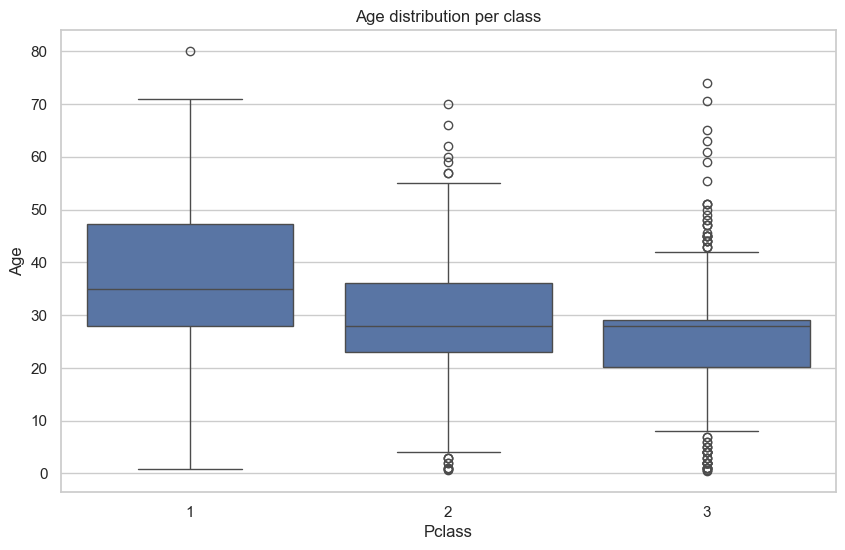

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass" , y="Age" , data=df)
plt.title("Age distribution per class")
plt.show()

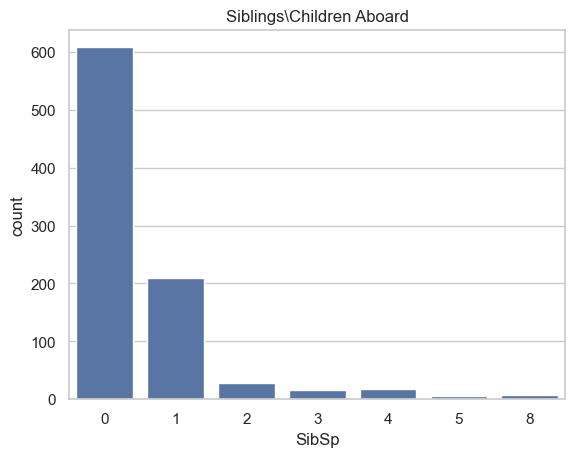

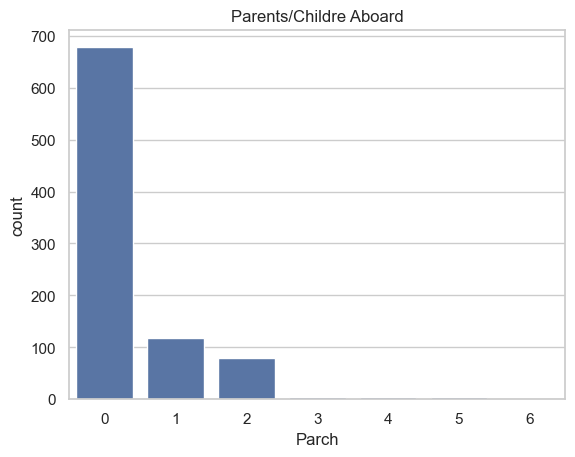

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64

In [47]:
sns.countplot(x="SibSp" , data=df)
plt.title("Siblings\Children Aboard")
plt.show()

sns.countplot(x="Parch" , data=df)
plt.title("Parents/Childre Aboard")
plt.show()
df["SibSp"].value_counts(normalize=True)

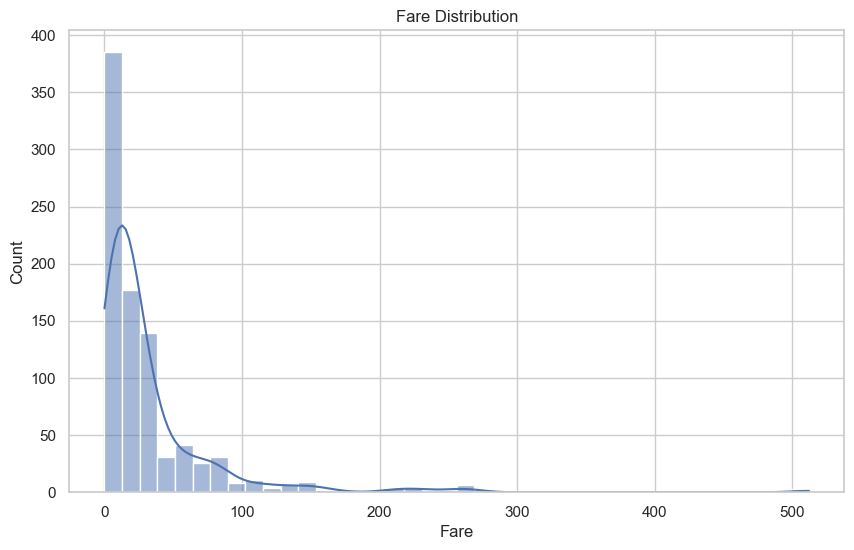

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df["Fare"] , bins=40 , kde=True)
plt.title("Fare Distribution")
plt.show()

In [51]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

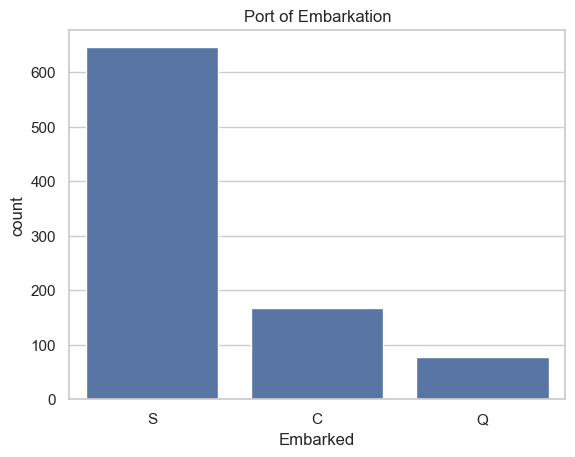

In [53]:
sns.countplot(x="Embarked" , data=df)
plt.title("Port of Embarkation")
plt.show()

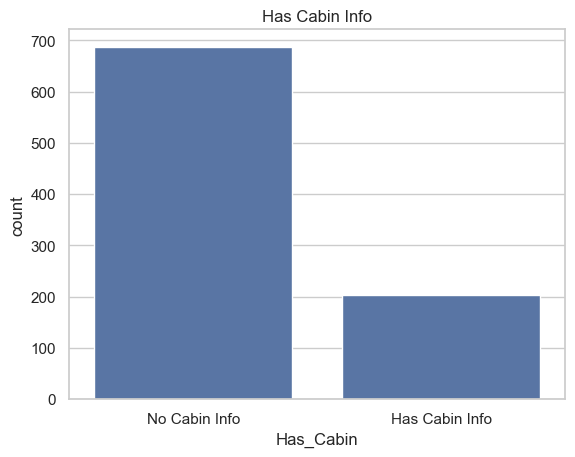

In [55]:
sns.countplot(x="Has_Cabin" , data=df)
plt.title("Has Cabin Info")
plt.xticks([0,1] , ["No Cabin Info" , "Has Cabin Info"])
plt.show()

In [57]:
df["Has_Cabin"].value_counts(normalize=True)

Has_Cabin
0    0.771044
1    0.228956
Name: proportion, dtype: float64

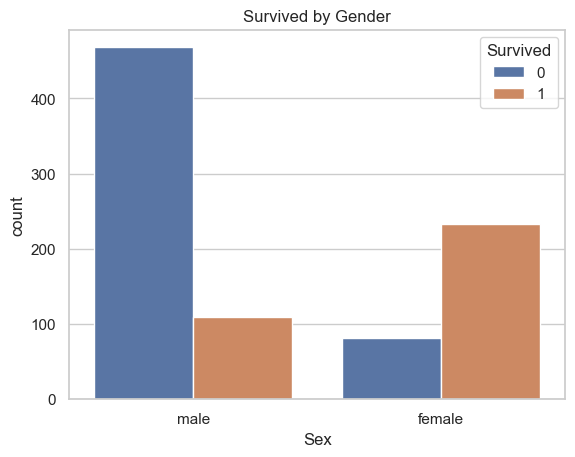

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [59]:
sns.countplot(x="Sex" , hue="Survived" , data=df)
plt.title("Survived by Gender")
plt.show()
pd.crosstab(df["Sex"] , df["Survived"] , normalize="index")

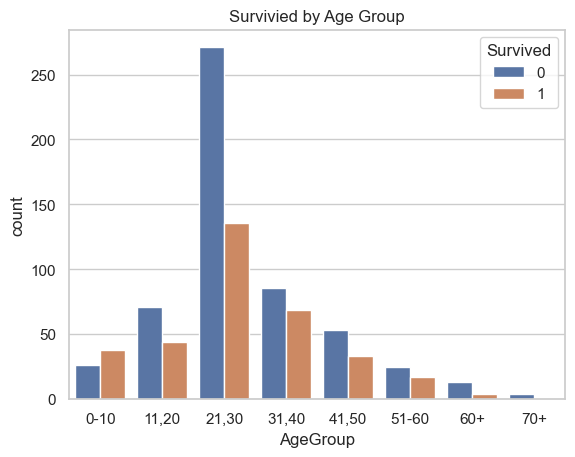

In [61]:
df["AgeGroup"] = pd.cut(df["Age"] , bins=[0,10,20,30,40,50,60,70,80] , labels=["0-10","11,20","21,30","31,40","41,50","51-60","60+","70+"])
sns.countplot(x="AgeGroup",hue="Survived",data=df)
plt.title("Survivied by Age Group")
plt.show()

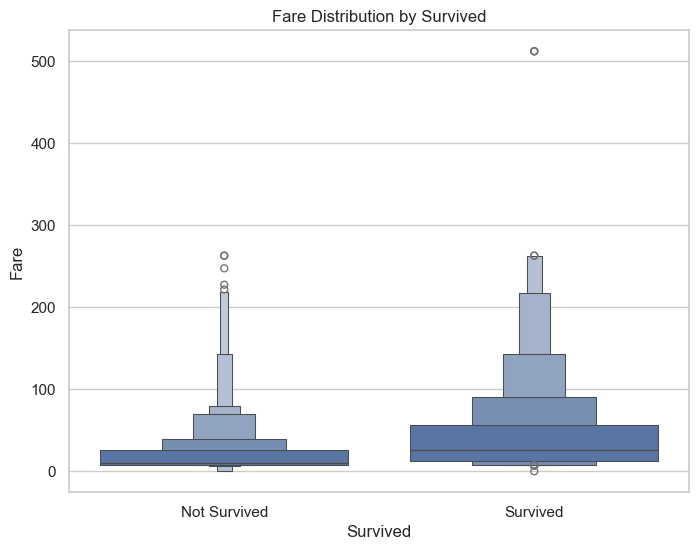

In [63]:
plt.figure(figsize=(8,6))
sns.boxenplot(x="Survived" , y="Fare", data=df)
plt.title("Fare Distribution by Survived")
plt.xticks([0,1] , ["Not Survived" , "Survived"])
plt.show()

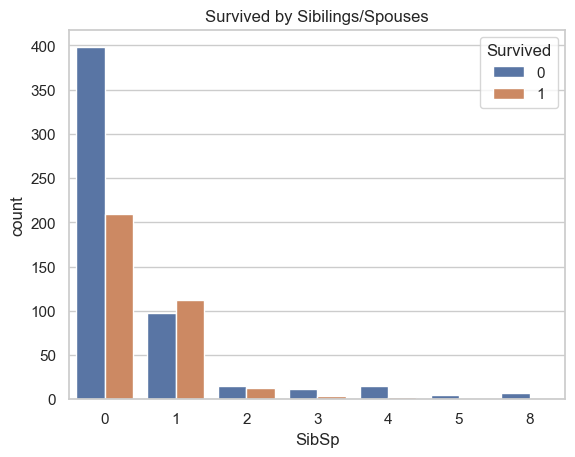

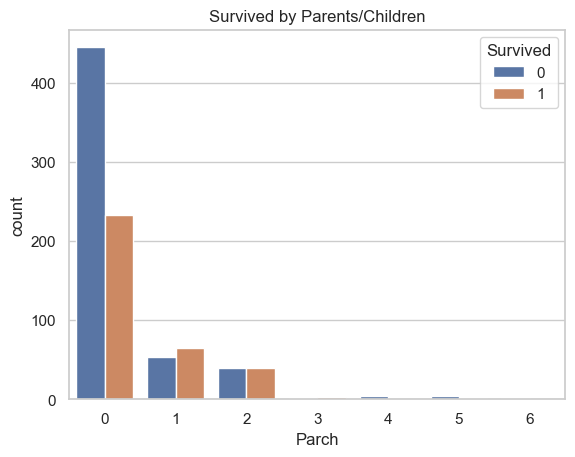

In [65]:
sns.countplot(x="SibSp" , hue="Survived" , data=df)
plt.title("Survived by Sibilings/Spouses")
plt.show()

sns.countplot(x="Parch" , hue="Survived" , data=df)
plt.title("Survived by Parents/Children")
plt.show()

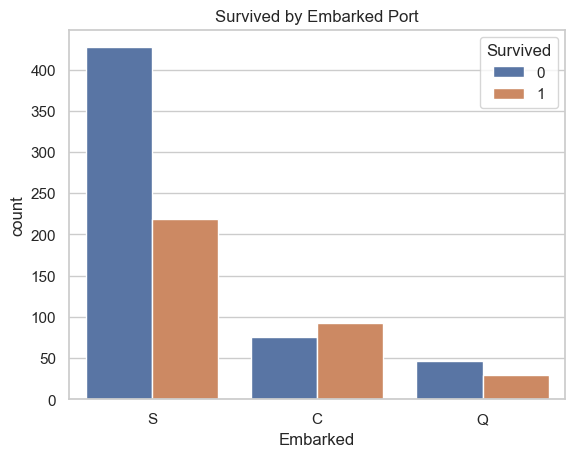

In [66]:
sns.countplot(x="Embarked" , hue="Survived" , data=df)
plt.title("Survived by Embarked Port")
plt.show()

In [69]:
pd.crosstab(index=df["Sex"] , columns=[df["Pclass"], df["Survived"]] , margins=True)

Pclass     1        2        3       All
Survived   0    1   0   1    0    1     
Sex                                     
female     3   91   6  70   72   72  314
male      77   45  91  17  300   47  577
All       80  136  97  87  372  119  891

In [71]:
pd.crosstab(index=df["Sex"] , columns=[df["Survived"] , df["Pclass"]])

Survived   0            1        
Pclass     1   2    3   1   2   3
Sex                              
female     3   6   72  91  70  72
male      77  91  300  45  17  47

In [73]:
pd.crosstab(df["Pclass"] , df["Survived"] , margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [75]:
pd.crosstab(df["Pclass"] , df["Survived"] , values=df["Fare"] , aggfunc="mean")

Survived,0,1
Pclass,,
1,64.684007,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [77]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

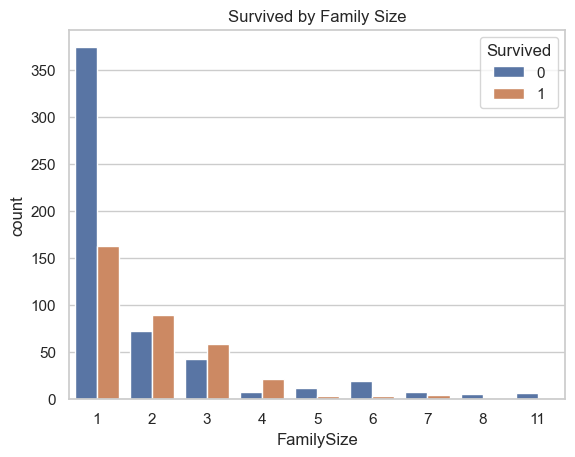

In [79]:
sns.countplot(x="FamilySize" , hue="Survived" ,data=df)
plt.title("Survived by Family Size")
plt.show()

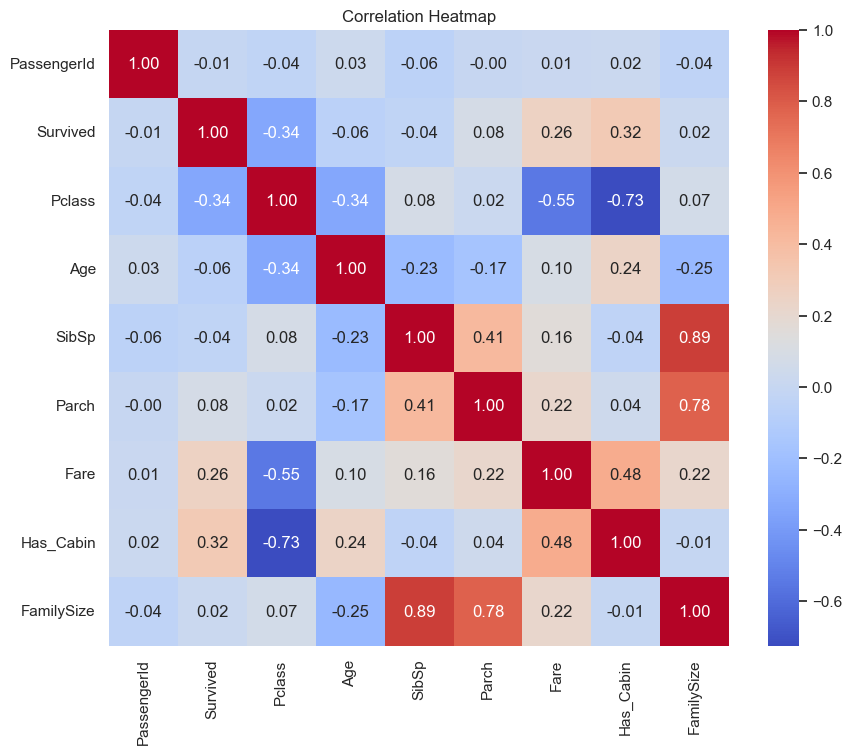

In [81]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr() , annot=True , cmap="coolwarm" , fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Conclusions
- **Gender & Survival:** Women had significantly higher survival rates.
- **Pclass:** Higher class passengers had better chances of survival.
- **Embarked:** Passengers from port 'C' had higher survival proportions.
- **Fare & Age:** Higher fare passengers tended to survive more; younger passengers had slightly higher survival.
- **Family Size:** Small family sizes fared better than individuals or large families.

This analysis provides a foundation for predictive modeling and further studies.
